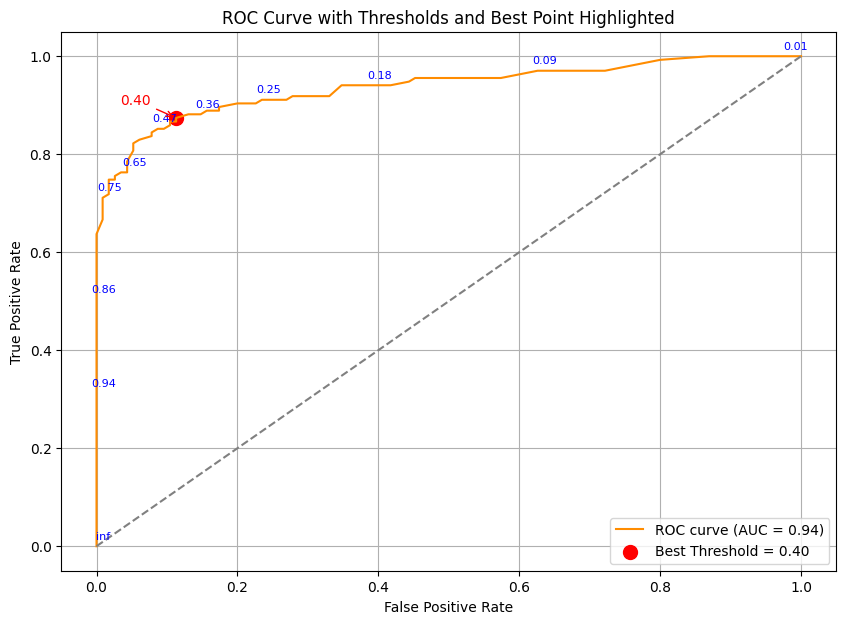

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Find the best threshold (closest point to top-left)
distances = np.sqrt((fpr - 0)**2 + (1 - tpr)**2)
best_index = np.argmin(distances)
best_threshold = thresholds[best_index]

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Annotate thresholds
for i in range(0, len(thresholds), int(len(thresholds)/10)):
    plt.annotate(f'{thresholds[i]:.2f}',
                 (fpr[i], tpr[i]),
                 textcoords="offset points",
                 xytext=(5,5),
                 ha='center',
                 fontsize=8,
                 color='blue')

# Highlight the best point
plt.scatter(fpr[best_index], tpr[best_index], color='red', s=100, label=f'Best Threshold = {best_threshold:.2f}')
plt.annotate(f'{best_threshold:.2f}',
             (fpr[best_index], tpr[best_index]),
             textcoords="offset points",
             xytext=(-40,10),
             color='red',
             fontsize=10,
             arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds and Best Point Highlighted')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


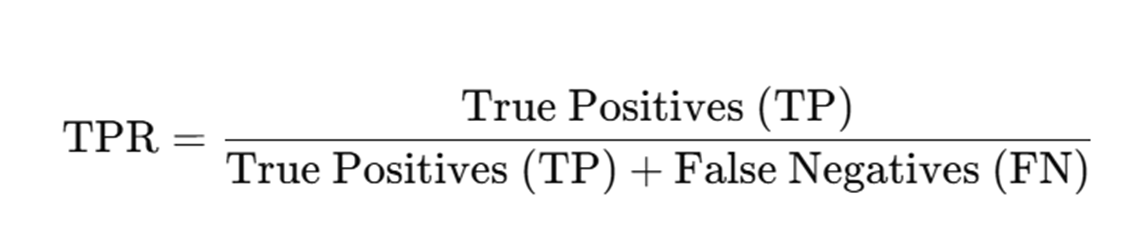

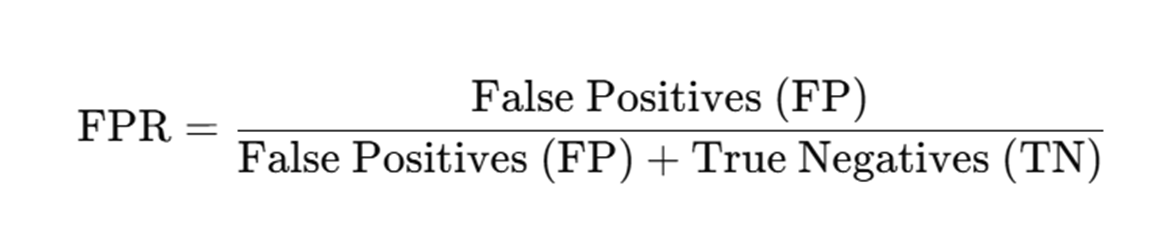

## **Understanding the shape of ROC**

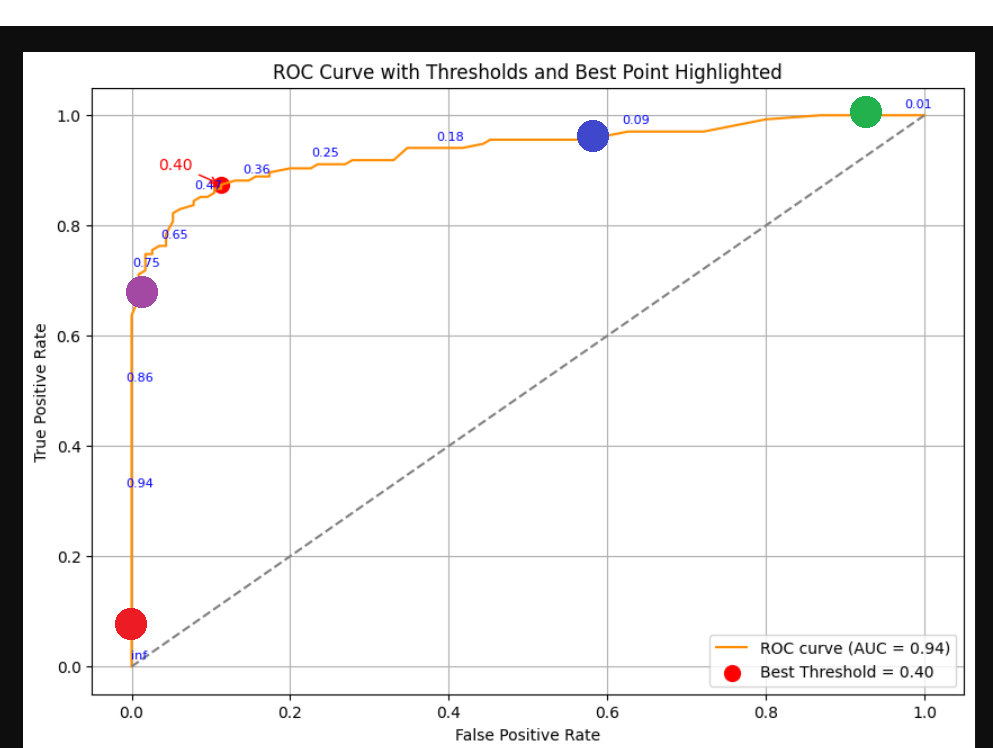

**GREEN POINT: very small threshold .1**

- all the emails are almost spam
- only the email that have prob less than .1 are not spam which are going to be very less

TPR:
- TP will be high because we are classifying everything as positive
- FN will be very low as we are classifying everything as positive
- eventually TPR will be high

FPR:
- FP will be high because most of the email are spam
- TN will be low as mostly everything is spam
- FPR will be very high

**so for low threshold both FPR and TPR will increase**

---

**RED POINT: very high threshold .9**

TPR:
 - as threshold is very high mostly everything is classified as 0 : TP will be very low
 - FN will be high - as we are classifying everything to 0
 - Thus TPR will be low

FPR:
 - FP will be low, as mostly everything is getting classified as 0 (not spam)
 - TN will be very high as everything is easily classified to mostly 0
 - thus FPR will be low


 **hence for very high threshold FPR and TPR both decrease = RED Point in the graph**


---


**PURPLE POINT:**

- form the Red point lets reduce the threshold a little bit say from .9 to 0.7

TPR:
 - this is increase the number of classification to class 1 i.e. spam emails
 - TP will go up and due to which FN will automatically go down
 - Thus TPR will go up ( along y -axis we will se increase)

FPR:
 - FP are the points that are acutally 0 but classified as 1 so mostly these
    point will be around slightly below 0.5 threshold hence FP will not change
 - Thus FPR will not change much hence we will not see much increase along x-axis


 **This is why the graph will take a convex curve towards top left corner**


---

**BLUE POINT:**

- lets now take a point where threshold is slightly more than green point say 0.2

- since we are increasing the threshold now FP will drastically reduce as earlier we were
classifying everything to 1 but now all the 0s will start classifying correctly reducing FP

- due to this FPR will increase significantly

TPR:
 - TP will not change much because TP record lie around high prob range and it will mostly stay unchanged
 - TPR wont change drastically ( less movement along y-axis )

 **so the overall effect will be that the curve will move faster towards y-axis **

 ---